## Build a model which can predict is a passenger will survive?

In [1]:
# import require libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import Model Name:

from sklearn.linear_model import LogisticRegression

In [3]:
# load titanic DataSet using sns

titanic = sns.load_dataset('titanic')

In [4]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [5]:
titanic.describe()

# Can see the not all person age is mention so we do data engineering further

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Understanding

In [6]:

titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

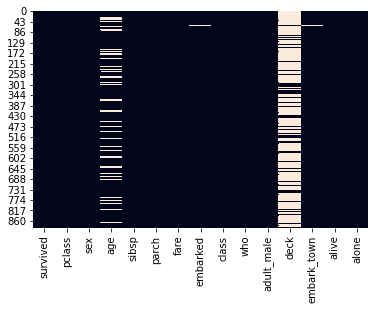

In [7]:
# lets plot heat map

sns.heatmap(titanic.isnull(),cbar=False)

# You can observe heatmap shows more deck values are unavailable and only less values



In [8]:
# Total No of passengers whoes age is not mention

titanic['age'].isnull().sum()


177

In [9]:
# Total no. of passengers

In [10]:
# Calculate percentage value

(titanic['age'].isnull().sum()/titanic['age'].shape)*100

# 19.8% people age is not mention

array([19.86531987])

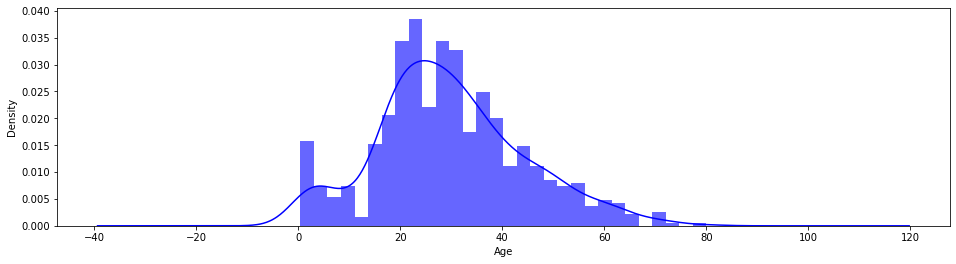

In [11]:
ax = titanic['age'].hist(color='Blue',stacked=True,bins=30,figsize=(16,4),alpha=0.6,density=True)

# we took ax cause we use oops way to set_xlabel and set_ylabel

ax.set_xlabel('Age')

# plot density with hist plot

titanic['age'].plot(kind='density',color='blue')
plt.show()

In [12]:
#  We can see age value using titanic.age and titanic['age'] both way
titanic.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

### Let's go ahead and see the distribution of surviving according to their age

Text(0.5, 1.0, 'Men')

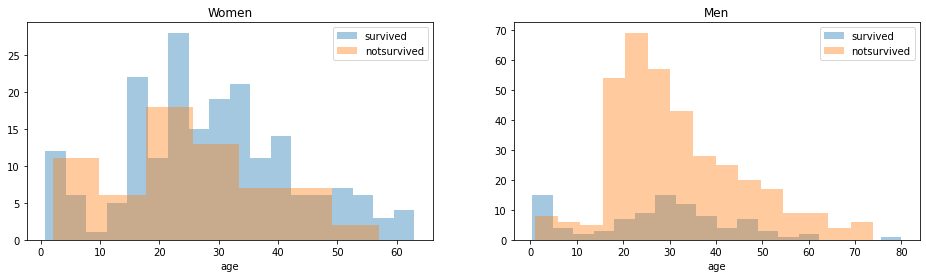

In [13]:
#  We took two variables survived and notsurvived that we use as labels for our distplot(distribution plot)
survived='survived'
notsurvived='notsurvived'

fig,axe= plt.subplots(nrows=1,ncols=2,figsize=(16,4))

# create new dataframe women and men
women = titanic[titanic['sex']=='female']
men = titanic[titanic['sex']=='male']

# ploting distribution plots for women and men based on their survival

a = sns.distplot(women[women['survived']==1].age.dropna(),bins=18,label= survived,ax=axe[0],kde=False)
a = sns.distplot(women[women['survived']==0].age.dropna(),label= notsurvived,ax=axe[0],kde=False)
a.legend()
a.set_title('Women')

a = sns.distplot(men[men['survived']==1].age.dropna(),bins=18,label= survived,ax=axe[1],kde=False)
a = sns.distplot(men[men['survived']==0].age.dropna(),label= notsurvived,ax=axe[1],kde=False)
a.legend()
a.set_title('Men')



In [14]:
# titanic describe

titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# How many Male and Female were in titanic

titanic['sex'].value_counts()


male      577
female    314
Name: sex, dtype: int64

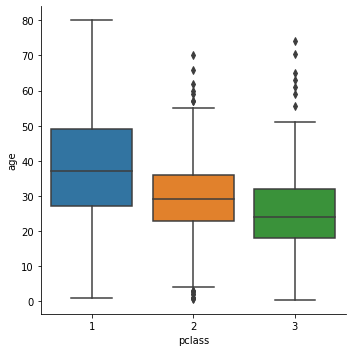

In [16]:
# Catagorical plot 

sns.catplot(x='pclass',y='age',data=titanic,kind='box')

# This box plot tells that 3rdclass passenger are mostly youngster and first class people have old age then 2nd and 3rd class.

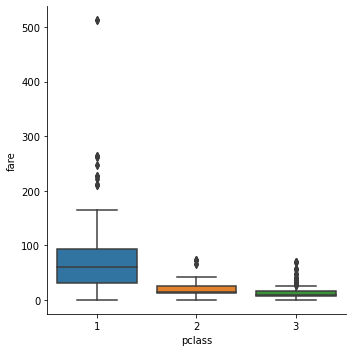

In [17]:
sns.catplot(x='pclass',y='fare',data=titanic,kind='box')

## Data Cleansingr
Replace all Nan(not a number) values with their mean value

In [18]:
#  Mean of people age who were in 1st class

c = titanic[titanic['pclass']==1]['age'].mean()
d = titanic[titanic['pclass']==2]['age'].mean()
e = titanic[titanic['pclass']==3]['age'].mean()

print(f"FirstClass passengers AgeMean:{c}\nSecondClass passengers AgeMean:{d}\nThirdClass Passengers AgeMean:{e}")

FirstClass passengers AgeMean:38.233440860215055
SecondClass passengers AgeMean:29.87763005780347
ThirdClass Passengers AgeMean:25.14061971830986


In [19]:
# Replace all NaN values with mean values


def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass==1:
            return c
        elif pclass==2:
            return d
        elif pclass==3:
            return e
    else:
        return age

In [20]:
titanic['age']=titanic[['age','pclass']].apply(impute_age,axis=1)

In [21]:
# Now check is there any null values

titanic['age'].isnull().sum()

0

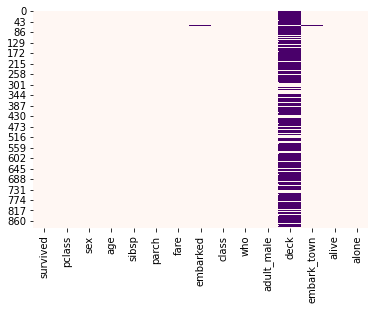

In [22]:
# Plot heat map, we can observe that no nan values are present in age column now

sns.heatmap(titanic.isnull(),cbar=False,cmap='RdPu')

## Analysing Embarked

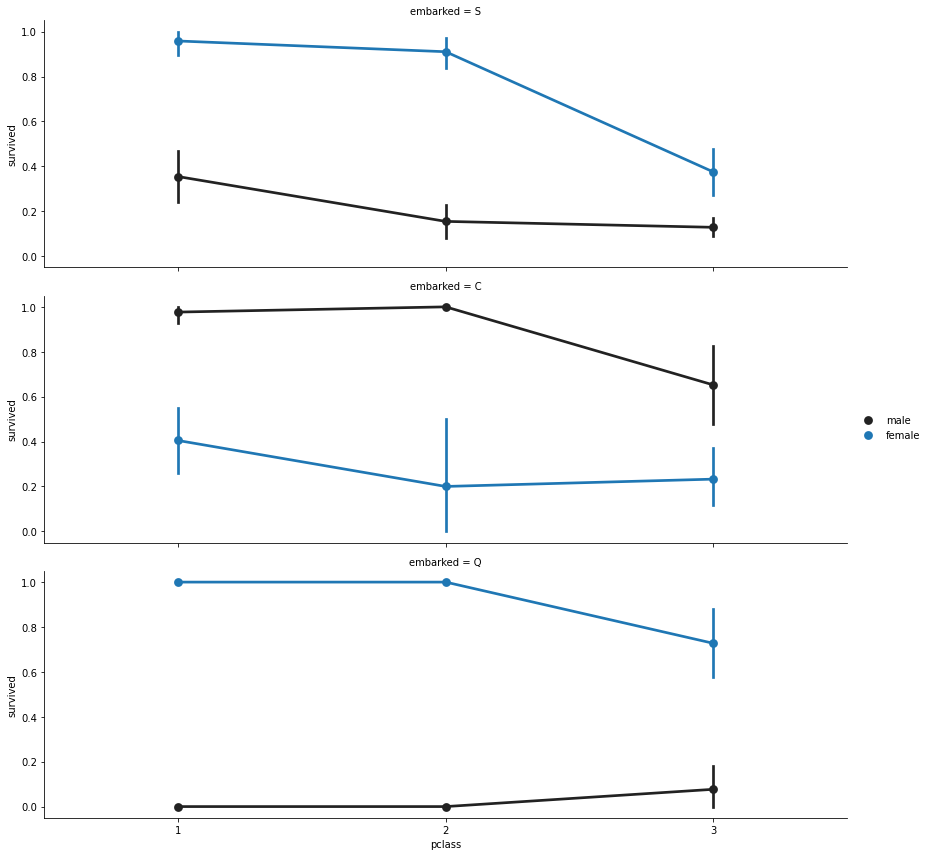

In [23]:
F = sns.FacetGrid(titanic, row='embarked', height=4, aspect=3)
F.map(sns.pointplot, 'pclass', 'survived', 'sex',order=None, hue_order=None) 
F.add_legend()

In [24]:
titanic['embarked'].isnull().sum()

2

In [25]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [26]:

fill_value = 'S'
titanic['embarked'].fillna(fill_value,inplace=True)

In [27]:
titanic['embarked'].isnull().sum()

0

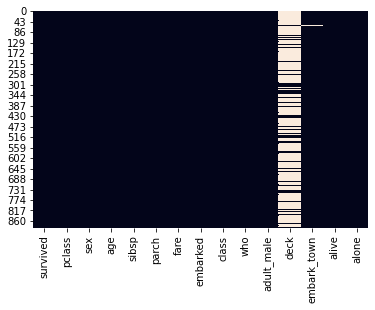

In [28]:
sns.heatmap(titanic.isnull(),cbar=False)
# can observe heatmap no nan values of age and embarked is present

In [29]:
titanic.drop(labels=['deck','embark_town','alive'],inplace=True,axis=1)

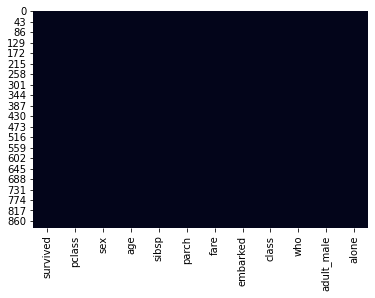

In [30]:
sns.heatmap(titanic.isnull(),cbar=False)

## Features Transformation
### Some columns like class, sex have catogorical data and most of columns have float and integers values thats why we need of features transformation

In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 54.9+ KB


In [32]:
titanic['fare']= titanic['fare'].astype('int64')
titanic['age']= titanic['age'].astype('int64')


In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    int64   
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    int64   
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), int64(6), object(3)
memory usage: 54.9+ KB


### Convert catagorical data into numerical data

In [34]:
# convert sex(object datatype) in to bool

gender ={'male':0,'female':1}
titanic['sex'] = titanic['sex'].map(gender)

In [35]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,S,Third,man,True,False
1,1,1,1,38,1,0,71,C,First,woman,False,False
2,1,3,1,26,0,0,7,S,Third,woman,False,True
3,1,1,1,35,1,0,53,S,First,woman,False,False
4,0,3,0,35,0,0,8,S,Third,man,True,True
5,0,3,0,25,0,0,8,Q,Third,man,True,True
6,0,1,0,54,0,0,51,S,First,man,True,True
7,0,3,0,2,3,1,21,S,Third,child,False,False
8,1,3,1,27,0,2,11,S,Third,woman,False,False
9,1,2,1,14,1,0,30,C,Second,child,False,False


In [36]:
who = {'man':0,'woman':1,'child':2}
titanic['who']= titanic['who'].map(who)


In [37]:
adult_male ={True:1,False:0}
titanic['adult_male'] = titanic['adult_male'].map(adult_male)


In [38]:
alone = {False:0,True:1}
titanic['alone'] = titanic['alone'].map(alone)

In [39]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,S,Third,0,1,0
1,1,1,1,38,1,0,71,C,First,1,0,0
2,1,3,1,26,0,0,7,S,Third,1,0,1
3,1,1,1,35,1,0,53,S,First,1,0,0
4,0,3,0,35,0,0,8,S,Third,0,1,1
5,0,3,0,25,0,0,8,Q,Third,0,1,1
6,0,1,0,54,0,0,51,S,First,0,1,1
7,0,3,0,2,3,1,21,S,Third,2,0,0
8,1,3,1,27,0,2,11,S,Third,1,0,0
9,1,2,1,14,1,0,30,C,Second,2,0,0


In [40]:
titanic.drop(['class'],axis=1,inplace=True)

In [41]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,0,22,1,0,7,S,0,1,0
1,1,1,1,38,1,0,71,C,1,0,0
2,1,3,1,26,0,0,7,S,1,0,1
3,1,1,1,35,1,0,53,S,1,0,0
4,0,3,0,35,0,0,8,S,0,1,1
5,0,3,0,25,0,0,8,Q,0,1,1
6,0,1,0,54,0,0,51,S,0,1,1
7,0,3,0,2,3,1,21,S,2,0,0
8,1,3,1,27,0,2,11,S,1,0,0
9,1,2,1,14,1,0,30,C,2,0,0


In [42]:
embarked = {'S':0,'C':1,'Q':2}
titanic['embarked'] = titanic['embarked'].map(embarked)

## Now we convert all columns values in to int data type, Let's see it

In [43]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,0,22,1,0,7,0,0,1,0
1,1,1,1,38,1,0,71,1,1,0,0
2,1,3,1,26,0,0,7,0,1,0,1
3,1,1,1,35,1,0,53,0,1,0,0
4,0,3,0,35,0,0,8,0,0,1,1
5,0,3,0,25,0,0,8,2,0,1,1
6,0,1,0,54,0,0,51,0,0,1,1
7,0,3,0,2,3,1,21,0,2,0,0
8,1,3,1,27,0,2,11,0,1,0,0
9,1,2,1,14,1,0,30,1,2,0,0


### Build Logistic Model

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [45]:
X = titanic.drop('survived',axis=1)
y = titanic['survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [46]:
X_train.shape

(596, 10)

In [47]:
model = LogisticRegression(max_iter=400)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)




In [48]:
model.score(X_test,y_test)

0.8305084745762712

In [49]:
y_test.shape,X_test.shape

((295,), (295, 10))

### Recursive Feature Elemation 
RFE (recursive feature selection) as title suggests recursively removes features, build a model using attributes and calculates model accuracy.RFE is able to work on combination of attributes that contribute to the prediction on the target variable(or class).

To perform RFE just import RFE from sklearn.feature_selection and pass any classifier model to RFE() with the no. of features that you want to select after that .fit() method must be called as you can see that we use .support_ method that tells us, which features are selected using RFE.
array([ True,  True, False,  True, False, False, False,  True,  True,False]) True values features are selected and False values features are not selected.

To know features ranking we use .ranking_ method that provides an array([1, 1, 5, 1, 3, 6, 4, 1, 1, 2])that informs us ranks of features with respect to other features.


In [50]:
# import recursive feature elimination 

from sklearn.feature_selection import RFE

In [51]:
model = LogisticRegression(solver='lbfgs',max_iter=500)
rfe = RFE(model,5,verbose=1)
rfe = rfe.fit(X,y)

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [52]:
X.shape

(891, 10)

In [53]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,3,0,22,1,0,7,0,0,1,0
1,1,1,38,1,0,71,1,1,0,0
2,3,1,26,0,0,7,0,1,0,1
3,1,1,35,1,0,53,0,1,0,0
4,3,0,35,0,0,8,0,0,1,1


### Lets check which features from above dataset is now available

In [54]:
rfe.support_

array([ True,  True, False,  True, False, False, False,  True,  True,
       False])

In [55]:
rfe.ranking_

array([1, 1, 5, 1, 3, 6, 4, 1, 1, 2])

In [56]:
xx = X[X.columns[rfe.support_]]

In [57]:
xx.head(2)

,pclass,sex,sibsp,who,adult_male
0,3,0,1,0,1
1,1,1,1,1,0


In [58]:
X_train,X_test,y_train,y_test = train_test_split(xx,y,test_size=0.20,random_state=8,stratify=y)

In [59]:
X_train.shape

(712, 5)

In [60]:
model = LogisticRegression(max_iter=400)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
model.score(X_test,y_test)




0.8491620111731844

### Accuracy,f1_score,precision,recall,AUC_Roc curve
AUC = area under the curve 
ROC_curve = reciever operating system

<img src="image2.png">

<img src='image.png'>

In [61]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve,roc_auc_score,roc_curve,auc,log_loss


In [62]:
model = LogisticRegression(max_iter=400)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
# calculate y_predict probability
y_predict_prob = model.predict_proba(X_test)[:,1]




In [63]:
y_predict_prob

array([0.41075592, 0.83492018, 0.09460891, 0.09460891, 0.42656371,
       0.5347813 , 0.21801866, 0.09460891, 0.05959119, 0.21801866,
       0.21801866, 0.75412138, 0.09460891, 0.21801866, 0.93100766,
       0.83492018, 0.5347813 , 0.5347813 , 0.93100766, 0.83492018,
       0.03700488, 0.09460891, 0.21801866, 0.09460891, 0.6546499 ,
       0.31086537, 0.75412138, 0.09460891, 0.09460891, 0.89110522,
       0.42656371, 0.09460891, 0.89110522, 0.89110522, 0.42656371,
       0.09460891, 0.09460891, 0.05959119, 0.24917612, 0.09460891,
       0.09460891, 0.09460891, 0.5347813 , 0.42656371, 0.09460891,
       0.09460891, 0.05959119, 0.6546499 , 0.93100766, 0.93100766,
       0.09460891, 0.09460891, 0.42656371, 0.42656371, 0.14461931,
       0.6546499 , 0.93100766, 0.93100766, 0.31086537, 0.21801866,
       0.05959119, 0.14461931, 0.78573692, 0.09460891, 0.93100766,
       0.09460891, 0.21801866, 0.05959119, 0.93100766, 0.89110522,
       0.93100766, 0.09460891, 0.59810218, 0.6546499 , 0.31086

In [64]:
roc_curve(y_test,y_predict_prob)

(array([0.        , 0.        , 0.00909091, 0.00909091, 0.00909091,
        0.00909091, 0.00909091, 0.01818182, 0.01818182, 0.01818182,
        0.04545455, 0.05454545, 0.10909091, 0.20909091, 0.21818182,
        0.22727273, 0.25454545, 0.28181818, 0.43636364, 0.46363636,
        0.87272727, 0.97272727, 1.        ]),
 array([0.        , 0.01449275, 0.20289855, 0.2173913 , 0.4057971 ,
        0.52173913, 0.55072464, 0.5942029 , 0.60869565, 0.68115942,
        0.7826087 , 0.7826087 , 0.7826087 , 0.85507246, 0.85507246,
        0.86956522, 0.89855072, 0.89855072, 0.91304348, 0.91304348,
        0.98550725, 1.        , 1.        ]),
 array([1.96310717, 0.96310717, 0.93100766, 0.9072729 , 0.89110522,
        0.83492018, 0.83228221, 0.78573692, 0.78251773, 0.75412138,
        0.6546499 , 0.59810218, 0.5347813 , 0.42656371, 0.41075592,
        0.33151319, 0.31086537, 0.24917612, 0.21801866, 0.14461931,
        0.09460891, 0.05959119, 0.01393413]))

In [65]:
[fpr,tpr,thr]=roc_curve(y_test,y_predict_prob)


In [66]:
# False Positive rate 
fpr

array([0.        , 0.        , 0.00909091, 0.00909091, 0.00909091,
       0.00909091, 0.00909091, 0.01818182, 0.01818182, 0.01818182,
       0.04545455, 0.05454545, 0.10909091, 0.20909091, 0.21818182,
       0.22727273, 0.25454545, 0.28181818, 0.43636364, 0.46363636,
       0.87272727, 0.97272727, 1.        ])

In [67]:
# True postive rate
tpr

array([0.        , 0.01449275, 0.20289855, 0.2173913 , 0.4057971 ,
       0.52173913, 0.55072464, 0.5942029 , 0.60869565, 0.68115942,
       0.7826087 , 0.7826087 , 0.7826087 , 0.85507246, 0.85507246,
       0.86956522, 0.89855072, 0.89855072, 0.91304348, 0.91304348,
       0.98550725, 1.        , 1.        ])

In [68]:
# threshold
thr

array([1.96310717, 0.96310717, 0.93100766, 0.9072729 , 0.89110522,
       0.83492018, 0.83228221, 0.78573692, 0.78251773, 0.75412138,
       0.6546499 , 0.59810218, 0.5347813 , 0.42656371, 0.41075592,
       0.33151319, 0.31086537, 0.24917612, 0.21801866, 0.14461931,
       0.09460891, 0.05959119, 0.01393413])

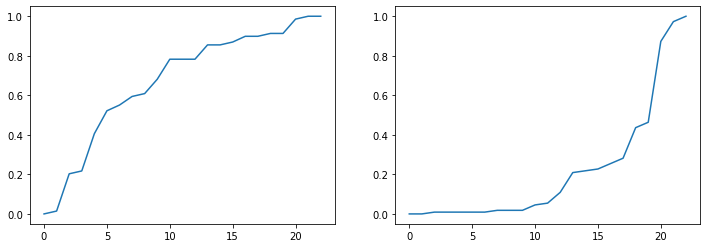

In [69]:
fig,axe = plt.subplots(1,2,figsize =(12,4))
axe[0].plot(tpr)
axe[1].plot(fpr)

In [70]:
print(f"accuracy:{accuracy_score(y_test,y_predict)}\nlogg_loss:{log_loss(y_test,y_predict_prob)}\nauc:{auc(fpr,tpr)}")

accuracy:0.8491620111731844
logg_loss:0.3651903011060725
auc:0.901844532279315


In [71]:
# Create an array where tpr values is greater than 0.95
np.where(tpr>0.95)

(array([20, 21, 22], dtype=int32),)

In [72]:
# Selectmin value 
id = np.min(np.where(tpr>0.95))
id

20

In [73]:
fpr[id]*100

87.27272727272727

In [74]:
np.array(fpr[id]*100)

array(87.27272727)

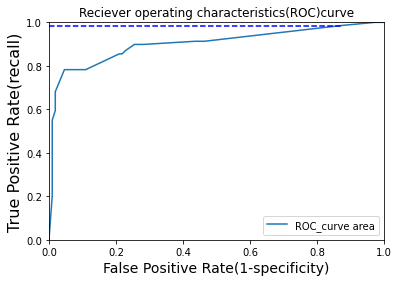

using a threshold of 0.095,guarantees a sensitivity of 0.986and a specificity of 0.127 i.e a false positive rate of 87.27%


In [75]:

plt.figure()
plt.plot(fpr,tpr,label='ROC_curve area')
# plt.plot([0,1],[0,1],'k--')
plt.plot([0,fpr[id]],[tpr[id],tpr[id]],'k--',color='blue')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate(1-specificity)',fontsize=14)
plt.ylabel('True Positive Rate(recall)',fontsize=16)
plt.title('Reciever operating characteristics(ROC)curve')
plt.legend(loc='lower right')
plt.show()

print("using a threshold of %.3f" %thr[id] + ",guarantees a sensitivity of %.3f" %tpr[id]+
      "and a specificity of %.3f" %(1-fpr[id])+" i.e a false positive rate of %.2f%%" %(fpr[id]*100))